In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import zipfile
import os

Extracting the dataset

In [ ]:
with zipfile.ZipFile('/content/human+activity+recognition+using+smartphones.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [ ]:
with zipfile.ZipFile('/content/data/UCI HAR Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data_again')

In [ ]:
data_dir = "/content/data_again"
print(os.listdir(data_dir))

['__MACOSX', 'UCI HAR Dataset']


In [ ]:
for root, dirs, files in os.walk(data_dir):
    for file in files:
        print(os.path.join(root, file))

/content/data_again/__MACOSX/._UCI HAR Dataset
/content/data_again/__MACOSX/UCI HAR Dataset/._README.txt
/content/data_again/__MACOSX/UCI HAR Dataset/._features.txt
/content/data_again/__MACOSX/UCI HAR Dataset/._activity_labels.txt
/content/data_again/__MACOSX/UCI HAR Dataset/._train
/content/data_again/__MACOSX/UCI HAR Dataset/._.DS_Store
/content/data_again/__MACOSX/UCI HAR Dataset/._features_info.txt
/content/data_again/__MACOSX/UCI HAR Dataset/._test
/content/data_again/__MACOSX/UCI HAR Dataset/test/._Inertial Signals
/content/data_again/__MACOSX/UCI HAR Dataset/test/._X_test.txt
/content/data_again/__MACOSX/UCI HAR Dataset/test/._subject_test.txt
/content/data_again/__MACOSX/UCI HAR Dataset/test/._y_test.txt
/content/data_again/__MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt
/content/data_again/__MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_z_test.txt
/content/data_again/__MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_gyro_x_test.txt
/content/

In [ ]:
#Load feature names
feature_names = pd.read_csv(os.path.join(data_dir, "UCI HAR Dataset", "features.txt"), delim_whitespace=True, header=None)[1].tolist()

#Load datasets
X_train = pd.read_csv(os.path.join(data_dir, "UCI HAR Dataset", 'train', 'X_train.txt'), delim_whitespace=True, header=None)

y_train = pd.read_csv(os.path.join(data_dir, "UCI HAR Dataset", "train", "y_train.txt"), delim_whitespace=True, header=None, names=["Activity"])

X_test = pd.read_csv(os.path.join(data_dir, "UCI HAR Dataset", 'test', 'X_test.txt'), delim_whitespace=True, header=None)

y_test = pd.read_csv(os.path.join(data_dir, "UCI HAR Dataset", "test", "y_test.txt"), delim_whitespace=True, header=None, names=["Activity"])

#Converts class integers to one-hot encoded format to use with categorical crossentropy
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


<ipython-input-34-0d822f085966>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  feature_names = pd.read_csv(os.path.join(data_dir, "UCI HAR Dataset", "features.txt"), delim_whitespace=True, header=None)[1].tolist()
<ipython-input-34-0d822f085966>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(os.path.join(data_dir, "UCI HAR Dataset", 'train', 'X_train.txt'), delim_whitespace=True, header=None)
<ipython-input-34-0d822f085966>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(os.path.join(data_dir, "UCI HAR Dataset", "train", "y_train.txt"), delim_whitespace=True, header=None, names=["Activity"])
<ipython-input-34-0d822f085966>:9: FutureWarning: The 'del

(7352, 561) (7352, 7)
(2947, 561) (2947, 7)


<ipython-input-34-0d822f085966>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv(os.path.join(data_dir, "UCI HAR Dataset", "test", "y_test.txt"), delim_whitespace=True, header=None, names=["Activity"])


Preprocessing the data

In [ ]:
# 1. Standardize features (X_train is still 2D here)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Reshape to 3D AFTER scaling to match LSTM input requirement
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])



Build LSTM Model

In [ ]:
num_classes = y_train.shape[1] #No. of columns

model = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True), #Learns temporal patterns
    layers.Dropout(0.5), #Regularization
    layers.LSTM(32), #Reduces dimensionality
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'), #Fully connected
    layers.Dense(num_classes, activation='softmax'), #Multi-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 1, 64)          │       160,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,239 (684.53 KB)

 Trainable params: 175,239 (684.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3895 - loss: 1.6295 - val_accuracy: 0.7750 - val_loss: 0.6436
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7639 - loss: 0.6292 - val_accuracy: 0.9259 - val_loss: 0.2780
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8508 - loss: 0.3534 - val_accuracy: 0.9266 - val_loss: 0.2311
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9089 - loss: 0.2418 - val_accuracy: 0.9320 - val_loss: 0.1813
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9335 - loss: 0.1891 - val_accuracy: 0.9477 - val_loss: 0.1336
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9457 - loss: 0.1541 - val_accuracy: 0.9470 - val_loss: 0.1534
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9524 - loss: 0.1418 - val_accuracy: 0.9409 - val_loss: 0.1683
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9551 - loss: 0.1273 - val_accuracy: 0.9517 - val_loss

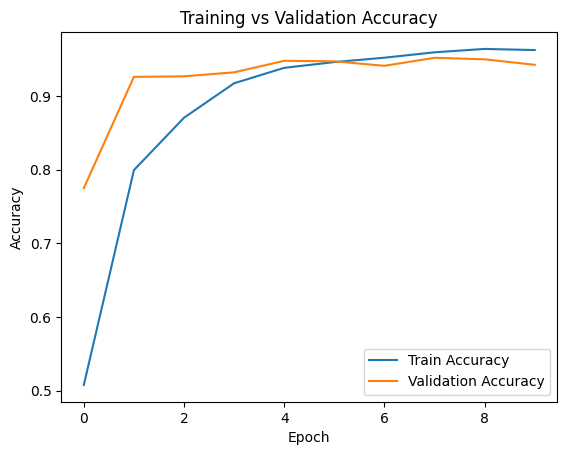

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stop])

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1) #Converts y_test back to class indices for comparison

print(classification_report(y_test_labels, y_pred))

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           1       0.91      0.99      0.95       496
           2       0.97      0.87      0.92       471
           3       0.92      0.93      0.92       420
           4       0.90      0.89      0.89       491
           5       0.91      0.91      0.91       532
           6       0.99      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



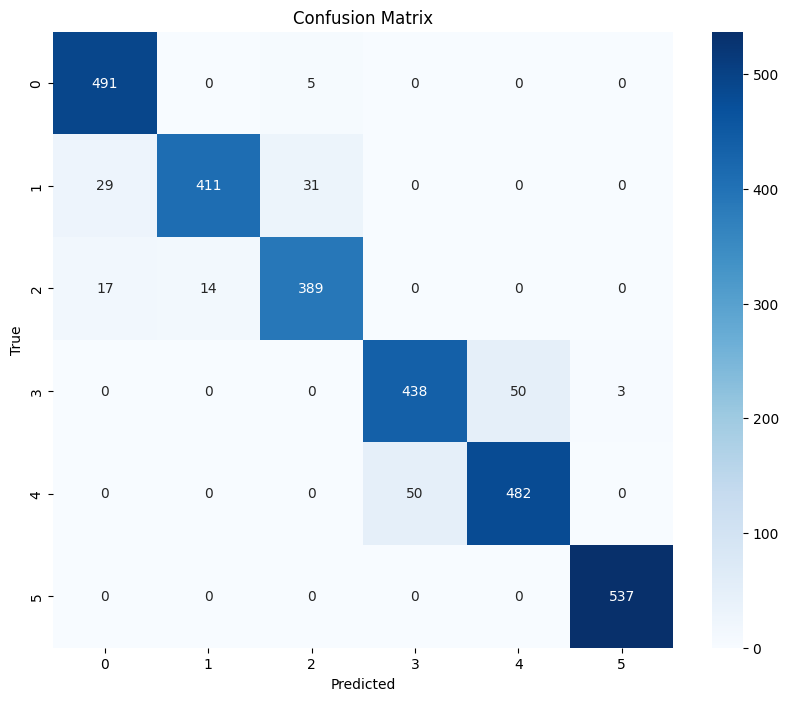

In [ ]:
conf_matrix = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt = 'd', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 93.25%
